1. **What is K-Nearest Neighbors (KNN) and how does it work?**

K-Nearest Neighbors (KNN) is a simple, instance-based machine learning algorithm used for classification and regression. It classifies a new data point based on the majority label of its K closest neighbors in the feature space.

How it works:

For a given test sample, calculate the distance between this sample and all training samples.

Select the K closest points (neighbors) based on the distance metric (commonly Euclidean).

For classification, assign the class label most common among these K neighbors.

For regression, average the values of the K neighbors to predict the output.

2. **What is the difference between KNN Classification and KNN Regression?**

KNN Classification: The output is a class label. The predicted class for a test point is determined by the majority class among its K nearest neighbors.

KNN Regression: The output is a continuous value. The predicted value is the average (or weighted average) of the values of the K nearest neighbors.

3. **What is the role of the distance metric in KNN?**

The distance metric defines how similarity or closeness between points is measured. Common metrics:

Euclidean distance (most common)

Manhattan distance

Minkowski distance

Cosine similarity (less common for KNN)

The choice affects which neighbors are considered "closest" and can significantly influence the algorithm's performance.

4. **What is the Curse of Dimensionality in KNN?**

As the number of features (dimensions) increases:

Data points become sparse.

Distance metrics lose meaning because distances between points tend to become similar.

It becomes difficult for KNN to find meaningful nearest neighbors.

This phenomenon is called the Curse of Dimensionality, which degrades KNN performance in high-dimensional spaces.

5. **How can we choose the best value of K in KNN?**

Use cross-validation to test multiple values of K and select the one that yields the best validation accuracy.

Small K (like 1) can cause overfitting (noisy predictions).

Large K smooths the decision boundary but can cause underfitting.

Often odd values of K are preferred to avoid ties in classification.

6. **What are KD Tree and Ball Tree in KNN?**

Both are data structures that speed up nearest neighbor searches:

KD Tree: A binary space-partitioning tree dividing data along axis-aligned hyperplanes. Efficient for low to moderate dimensions (~<20).

Ball Tree: Organizes points in a hierarchy of hyperspheres (balls). Better suited for higher dimensional data than KD Trees.

7. **When should you use KD Tree vs. Ball Tree?**

Use KD Tree for low-dimensional datasets because it's simpler and efficient there.

Use Ball Tree for high-dimensional datasets where KD Tree performance degrades.

8. **What are the disadvantages of KNN?**

Computationally expensive at prediction time (requires distance calculation to all points).

Poor performance with high-dimensional data (curse of dimensionality).

Sensitive to irrelevant or noisy features.

Sensitive to choice of K and distance metric.

No explicit training step (lazy learner), so large datasets can slow predictions.

9. **How does feature scaling affect KNN?**

Feature scaling (e.g., normalization or standardization) is crucial because KNN uses distance metrics. Features with larger scales dominate the distance calculation, which can distort neighbor selection if not scaled.

10. **What is PCA (Principal Component Analysis)?**

PCA is a dimensionality reduction technique that transforms the original features into a smaller set of uncorrelated variables called principal components that capture the most variance in the data.

11. **How does PCA work?**

Compute the covariance matrix of the data.

Calculate eigenvalues and eigenvectors of the covariance matrix.

Sort eigenvectors by descending eigenvalues.

Project the data onto the top eigenvectors to reduce dimensions while preserving variance.

12. **What is the geometric intuition behind PCA?**

PCA finds new axes (principal components) that are directions in the feature space where the data varies the most. The first component is the direction with maximum variance, the second is orthogonal to the first and with the next highest variance, and so on.

13. **What is the difference between Feature Selection and Feature Extraction?**

Feature Selection: Choosing a subset of the original features without transformation.

Feature Extraction: Creating new features by transforming original features (e.g., PCA creates new components).

14. **What are Eigenvalues and Eigenvectors in PCA?**

Eigenvectors: Directions in feature space that define the principal components.

Eigenvalues: Scalars indicating the amount of variance captured along each eigenvector.

15. **How do you decide the number of components to keep in PCA?**

Use a scree plot to look at explained variance by each component.

Choose components that explain a high cumulative variance (e.g., 90-95%).

Use domain knowledge or downstream task requirements.

16. **Can PCA be used for classification?**

PCA is not a classification algorithm, but it is often used as a preprocessing step to reduce dimensionality before classification.

17. **What are the limitations of PCA?**

Assumes linear relationships.

Sensitive to outliers.

Does not consider class labels (unsupervised).

May discard useful information if variance is not related to the target.

18. **How do KNN and PCA complement each other?**

PCA reduces dimensionality and removes noise, which helps KNN perform better by mitigating the curse of dimensionality and speeding up distance computations.

19. **How does KNN handle missing values in a dataset?**

KNN does not inherently handle missing values. Common approaches:

Impute missing values before applying KNN.

Use KNN-based imputation (predict missing features using neighbors).

Remove samples with missing data.

20. **What are the key differences between PCA and Linear Discriminant Analysis (LDA)?**

Aspect	PCA	LDA
Goal	Maximize variance (unsupervised)	Maximize class separability (supervised)
Use of labels	No	Yes
Output dimensions	≤ number of features	≤ number of classes - 1
Application	Dimensionality reduction	Dimensionality reduction + classification
Components	Orthogonal principal components	Linear discriminants

KNN Accuracy on Iris: 1.0
KNN Regressor MSE: 1243.2541567463757
Accuracy Euclidean: 1.0
Accuracy Manhattan: 1.0


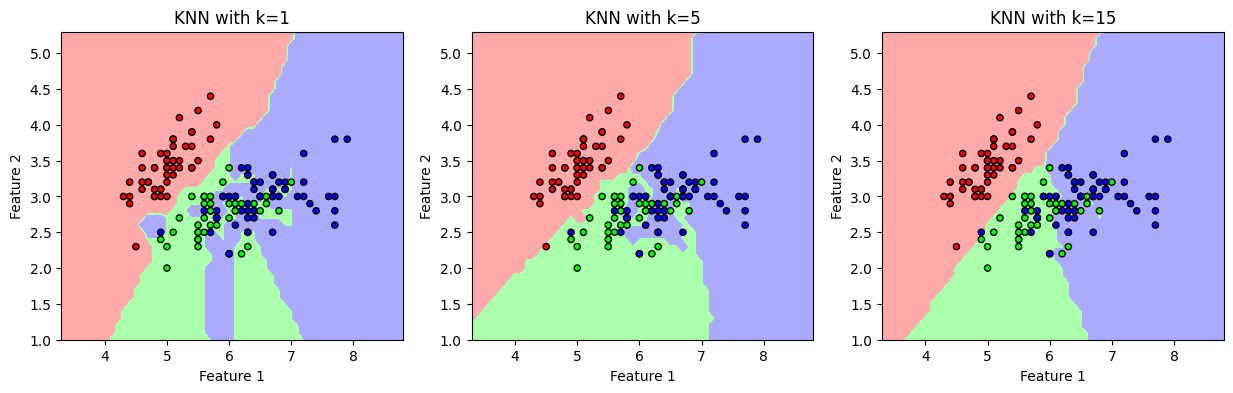

Accuracy with scaling: 1.0
Accuracy without scaling: 1.0
Explained variance ratio: [0.65816358 0.24755327 0.07677392 0.00700428 0.00586582 0.00463913]
Accuracy with PCA: 1.0
Accuracy without PCA: 1.0
Best params from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 1}
Best CV accuracy: 0.9523809523809523
Number of misclassified samples: 0


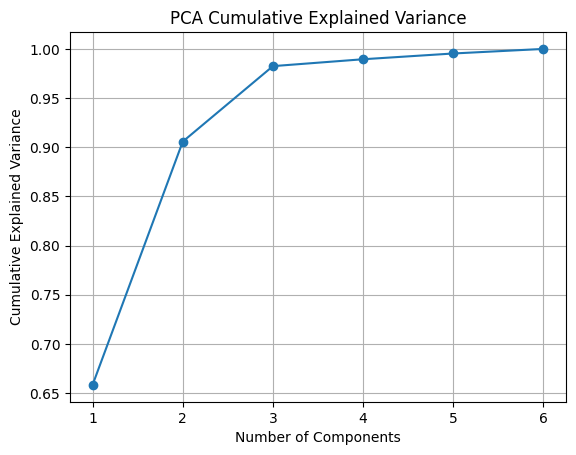

In [31]:
from sklearn.datasets import load_iris, make_regression, make_blobs
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train KNN Classifier on Iris and print accuracy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42, test_size=0.3)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN Accuracy on Iris:", accuracy_score(y_test, knn.predict(X_test)))

# 2. Train KNN Regressor on synthetic data and evaluate MSE
X_reg, y_reg = make_regression(n_samples=300, n_features=5, noise=10, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, random_state=42, test_size=0.3)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_r, y_train_r)
y_pred_r = knn_reg.predict(X_test_r)
print("KNN Regressor MSE:", mean_squared_error(y_test_r, y_pred_r))

# 3. KNN Classifier with Euclidean and Manhattan distances
knn_euc = KNeighborsClassifier(metric='euclidean')
knn_euc.fit(X_train, y_train)
acc_euc = accuracy_score(y_test, knn_euc.predict(X_test))

knn_man = KNeighborsClassifier(metric='manhattan')
knn_man.fit(X_train, y_train)
acc_man = accuracy_score(y_test, knn_man.predict(X_test))

print("Accuracy Euclidean:", acc_euc)
print("Accuracy Manhattan:", acc_man)

# 4. KNN Classifier with different K values, visualize decision boundaries (using first two features)
def plot_knn_decision_boundaries(X, y):
    from matplotlib.colors import ListedColormap
    h = .1
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,4))
    for i, k in enumerate([1, 5, 15]):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.subplot(1,3,i+1)
        plt.contourf(xx, yy, Z, cmap=cmap_light)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.title(f'KNN with k={k}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
    plt.show()

X_2d = iris.data[:, :2]
plot_knn_decision_boundaries(X_2d, iris.target)

# 5. Feature scaling before KNN, compare accuracy with unscaled data
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_s, y_train)
acc_scaled = accuracy_score(y_test, knn_scaled.predict(X_test_s))
acc_unscaled = accuracy_score(y_test, knn.predict(X_test))
print("Accuracy with scaling:", acc_scaled)
print("Accuracy without scaling:", acc_unscaled)

# 6. Train PCA on synthetic data and print explained variance ratio
X_syn, _ = make_blobs(n_samples=300, centers=4, n_features=6, random_state=42)
pca = PCA()
pca.fit(X_syn)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 7. Apply PCA before KNN and compare accuracy
pca_iris = PCA(n_components=2)
X_train_pca = pca_iris.fit_transform(X_train)
X_test_pca = pca_iris.transform(X_test)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))
print("Accuracy with PCA:", acc_pca)
print("Accuracy without PCA:", acc_unscaled)

# 8. Hyperparameter tuning with GridSearchCV on KNN
param_grid = {'n_neighbors': [1,3,5,7,9], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params from GridSearchCV:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# 9. Train KNN and check misclassified samples
y_pred = knn.predict(X_test)
misclassified = np.sum(y_pred != y_test)
print("Number of misclassified samples:", misclassified)

# 10. Train PCA and visualize cumulative explained variance
pca_full = PCA()
pca_full.fit(X_syn)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()


Accuracy uniform weights: 0.9629629629629629
Accuracy distance weights: 0.9629629629629629


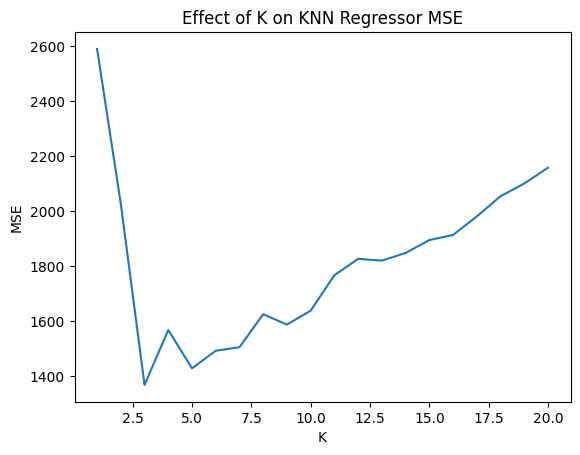

Missing values before: 247
Missing values after imputation: 0


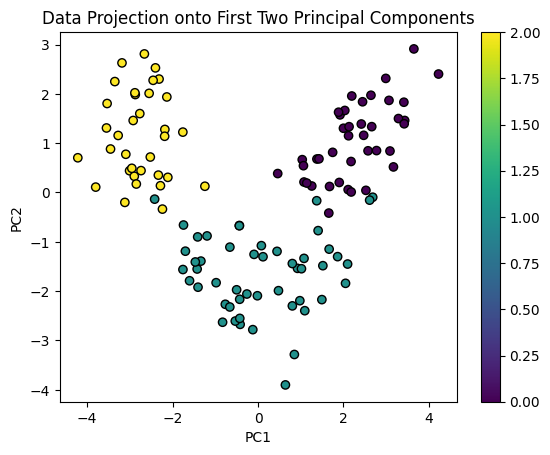

KD Tree accuracy: 0.9630, time: 0.0020s
Ball Tree accuracy: 0.9630, time: 0.0019s


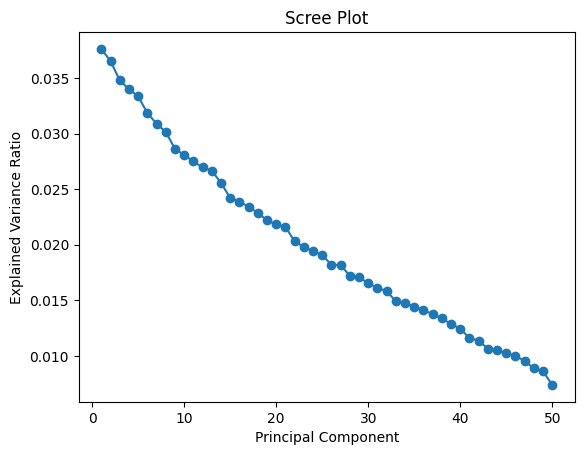

Precision: 0.9651, Recall: 0.9630, F1-Score: 0.9626


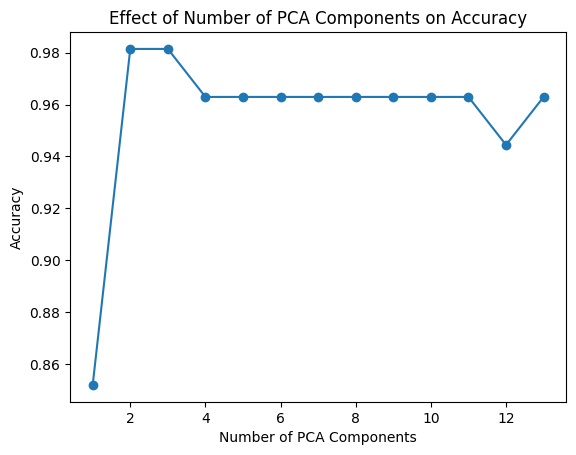

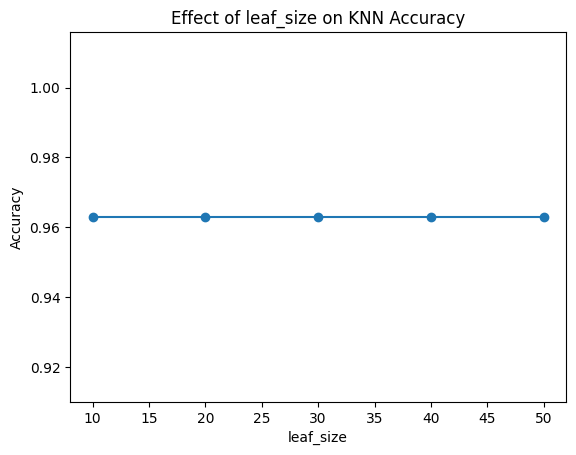

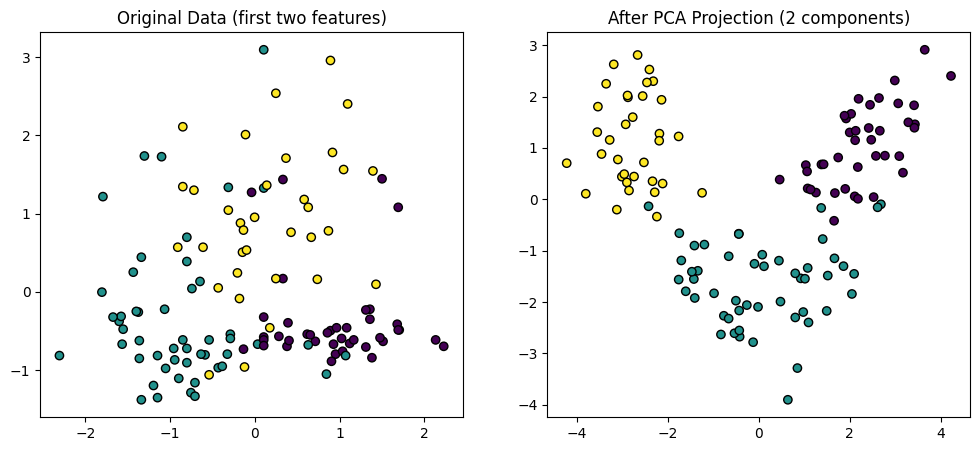

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

KNN Regressor MSE with euclidean distance: 1427.9250
KNN Regressor MSE with manhattan distance: 1433.8454
KNN Regressor MSE with chebyshev distance: 1633.2395
ROC-AUC score: 0.9985


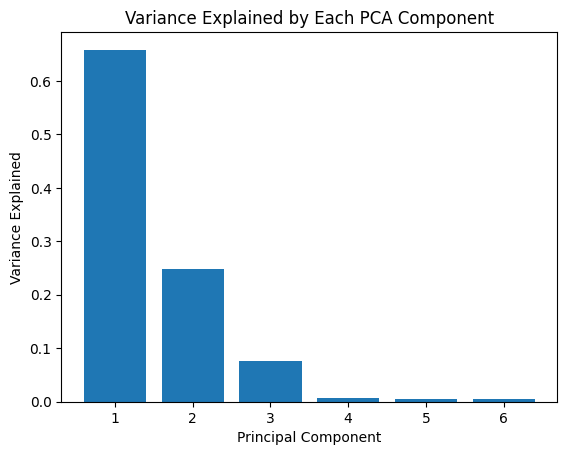

Accuracy with feature selection: 0.9815


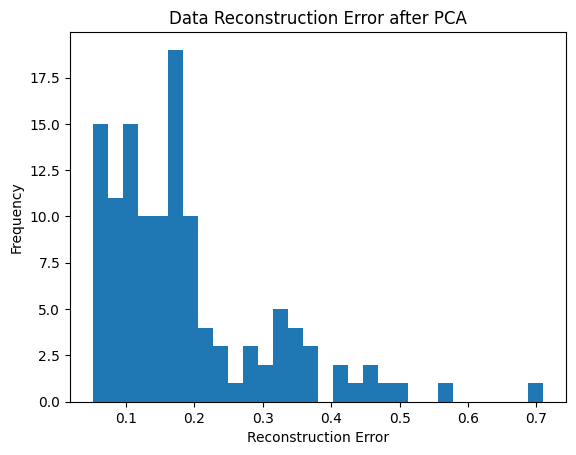

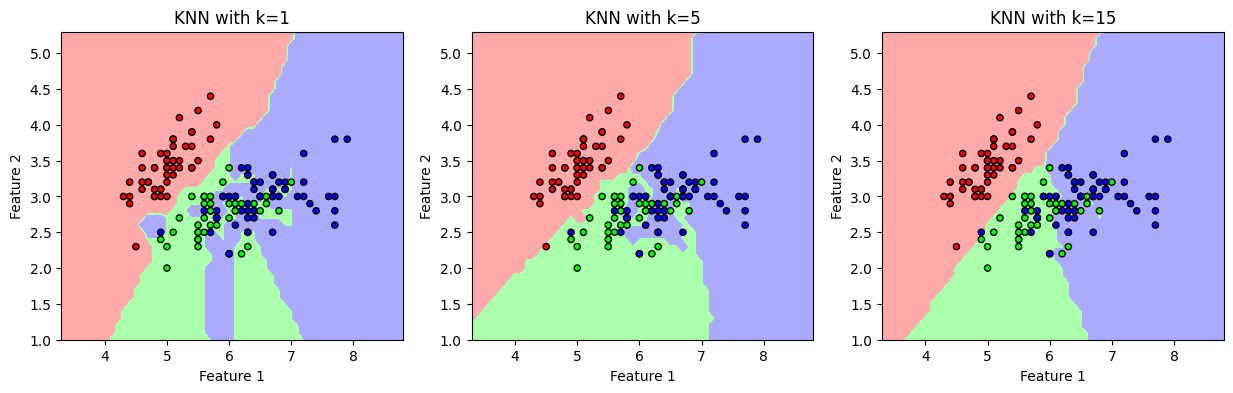

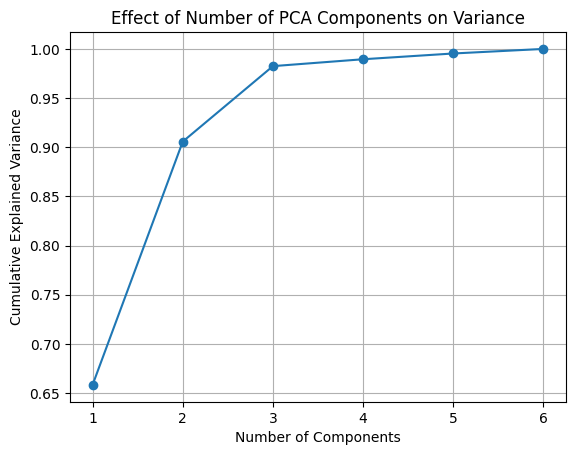

In [32]:
from sklearn.datasets import load_wine, make_regression
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

wine = load_wine()
X_wine, y_wine = wine.data, wine.target
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_w_s = scaler.fit_transform(X_train_w)
X_test_w_s = scaler.transform(X_test_w)

# 1. KNN Classifier with uniform vs distance weights
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train_w_s, y_train_w)
acc_uniform = accuracy_score(y_test_w, knn_uniform.predict(X_test_w_s))

knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train_w_s, y_train_w)
acc_distance = accuracy_score(y_test_w, knn_distance.predict(X_test_w_s))

print("Accuracy uniform weights:", acc_uniform)
print("Accuracy distance weights:", acc_distance)

# 2. KNN Regressor with different K values effect on MSE
X_reg, y_reg = make_regression(n_samples=300, n_features=5, noise=15, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
mses = []
ks = range(1, 21)
for k in ks:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_r, y_train_r)
    y_pred_r = knn_reg.predict(X_test_r)
    mses.append(mean_squared_error(y_test_r, y_pred_r))
plt.plot(ks, mses)
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Effect of K on KNN Regressor MSE')
plt.show()

# 3. KNN Imputation for missing data
X_missing = X_wine.copy()
np.random.seed(42)
mask = np.random.rand(*X_missing.shape) < 0.1
X_missing[mask] = np.nan
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_missing)
print("Missing values before:", np.isnan(X_missing).sum())
print("Missing values after imputation:", np.isnan(X_imputed).sum())

# 4. PCA model and visualize data projection onto first two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_w_s)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_w, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Projection onto First Two Principal Components')
plt.colorbar()
plt.show()

# 5. KNN Classifier with KD Tree vs Ball Tree and compare performance
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
start = time.time()
knn_kd.fit(X_train_w_s, y_train_w)
time_kd = time.time() - start
acc_kd = accuracy_score(y_test_w, knn_kd.predict(X_test_w_s))

knn_ball = KNeighborsClassifier(algorithm='ball_tree')
start = time.time()
knn_ball.fit(X_train_w_s, y_train_w)
time_ball = time.time() - start
acc_ball = accuracy_score(y_test_w, knn_ball.predict(X_test_w_s))

print(f"KD Tree accuracy: {acc_kd:.4f}, time: {time_kd:.4f}s")
print(f"Ball Tree accuracy: {acc_ball:.4f}, time: {time_ball:.4f}s")

# 6. PCA on high-dimensional data and Scree plot
X_high_dim, _ = make_regression(n_samples=300, n_features=50, noise=10, random_state=42)
pca_hd = PCA()
pca_hd.fit(X_high_dim)
plt.plot(range(1, len(pca_hd.explained_variance_ratio_)+1), pca_hd.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# 7. KNN Classifier evaluate Precision, Recall, F1-Score
knn = KNeighborsClassifier()
knn.fit(X_train_w_s, y_train_w)
y_pred_w = knn.predict(X_test_w_s)
prec, rec, f1, _ = precision_recall_fscore_support(y_test_w, y_pred_w, average='weighted')
print(f"Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")

# 8. PCA analyze effect of number of components on accuracy
component_range = range(1, X_train_w_s.shape[1]+1)
accuracies = []
for n in component_range:
    pca_n = PCA(n_components=n)
    X_train_n = pca_n.fit_transform(X_train_w_s)
    X_test_n = pca_n.transform(X_test_w_s)
    knn_n = KNeighborsClassifier()
    knn_n.fit(X_train_n, y_train_w)
    acc = accuracy_score(y_test_w, knn_n.predict(X_test_n))
    accuracies.append(acc)
plt.plot(component_range, accuracies, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Effect of Number of PCA Components on Accuracy')
plt.show()

# 9. KNN Classifier with different leaf_size and compare accuracy
leaf_sizes = [10, 20, 30, 40, 50]
leaf_accuracies = []
for leaf in leaf_sizes:
    knn_leaf = KNeighborsClassifier(leaf_size=leaf)
    knn_leaf.fit(X_train_w_s, y_train_w)
    acc_leaf = accuracy_score(y_test_w, knn_leaf.predict(X_test_w_s))
    leaf_accuracies.append(acc_leaf)
plt.plot(leaf_sizes, leaf_accuracies, marker='o')
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.title('Effect of leaf_size on KNN Accuracy')
plt.show()

# 10. PCA visualize data points before and after PCA
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train_w_s[:,0], X_train_w_s[:,1], c=y_train_w, cmap='viridis', edgecolor='k')
plt.title('Original Data (first two features)')
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train_w, cmap='viridis', edgecolor='k')
plt.title('After PCA Projection (2 components)')
plt.show()

# 11. Train KNN on Wine dataset and print classification report
print(classification_report(y_test_w, knn.predict(X_test_w_s)))

# 12. KNN Regressor with different distance metrics effect on MSE
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    knn_r = KNeighborsRegressor(metric=metric)
    knn_r.fit(X_train_r, y_train_r)
    y_pred_r = knn_r.predict(X_test_r)
    mse = mean_squared_error(y_test_r, y_pred_r)
    print(f"KNN Regressor MSE with {metric} distance: {mse:.4f}")

# 13. KNN Classifier evaluate ROC-AUC (one-vs-rest)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
y_test_bin = label_binarize(y_test_w, classes=np.unique(y_wine))
y_score = knn.predict_proba(X_test_w_s)
roc_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print(f"ROC-AUC score: {roc_auc:.4f}")

# 14. PCA visualize variance captured by each component
plt.bar(range(1, len(pca_full.explained_variance_ratio_)+1), pca_full.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each PCA Component')
plt.show()

# 15. KNN Classifier with feature selection before training
selector = SelectKBest(f_classif, k=5)
X_train_sel = selector.fit_transform(X_train_w_s, y_train_w)
X_test_sel = selector.transform(X_test_w_s)
knn_sel = KNeighborsClassifier()
knn_sel.fit(X_train_sel, y_train_w)
acc_sel = accuracy_score(y_test_w, knn_sel.predict(X_test_sel))
print(f"Accuracy with feature selection: {acc_sel:.4f}")

# 16. PCA data reconstruction error visualization
pca_5 = PCA(n_components=5)
X_train_proj = pca_5.fit_transform(X_train_w_s)
X_train_recon = pca_5.inverse_transform(X_train_proj)
reconstruction_error = np.mean((X_train_w_s - X_train_recon)**2, axis=1)
plt.hist(reconstruction_error, bins=30)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Data Reconstruction Error after PCA')
plt.show()

# 17. KNN Classifier decision boundary (2 features)
plot_knn_decision_boundaries(X_2d, iris.target)

# 18. PCA analyze effect of components on data variance
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Effect of Number of PCA Components on Variance')
plt.grid(True)
plt.show()
